In [10]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df.describe()

,packet_loss,latency,energy_consumption,Cluster
count,126240.000000,126240.000000,126240.000000,126240.000000
mean,12.556771,2.499655,39.370684,0.513308
std,3.288650,3.890734,27.139227,0.499825
min,2.122195,0.000000,12.524700,0.000000
25%,10.254390,0.000000,12.925000,0.000000
50%,12.700100,0.674592,13.303200,1.000000
75%,14.891150,3.229773,67.225300,1.000000
max,23.760850,40.817000,68.729600,1.000000


In [14]:
df.describe().round()

,packet_loss,latency,energy_consumption,load_mean,load_std,Cluster
count,126240.0,126240.0,126240.0,126240.0,126240.0,126240.0
mean,13.0,2.0,39.0,62.0,29.0,0.0
std,3.0,4.0,27.0,4.0,2.0,0.0
min,2.0,0.0,13.0,57.0,23.0,0.0
25%,10.0,0.0,13.0,57.0,28.0,0.0
50%,13.0,1.0,13.0,65.0,28.0,0.0
75%,15.0,3.0,67.0,65.0,32.0,1.0
max,24.0,41.0,69.0,69.0,32.0,1.0


In [32]:
import pandas as pd
import numpy as np
import ast

# load the dataset
df = pd.read_csv('merged_v12.csv')
df


,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption,Version
0,"[2, 0, 0, -1, -5, 0, -2, 0, 0, 0, 2, 0, -6, 2,...","[0, 7, 15, 15, 15, 13, 15, 9, 15, 15, 15, 11, ...","[100, 100, 100, 100, 100, 0, 100, 100, 100, 0,...","[50, 100, 50, 50, 100, 50, 50, 100, 20, 50, 50...",8.507650,3.693500,12.8240,v1
1,"[2, 0, 0, -1, -5, 0, -2, 0, 0, 0, 2, 0, -6, 2,...","[0, 7, 15, 15, 15, 13, 15, 9, 15, 15, 15, 11, ...","[100, 100, 100, 100, 100, 20, 80, 100, 100, 0,...","[50, 100, 50, 50, 100, 50, 50, 100, 20, 50, 50...",6.985480,1.486880,12.8581,v1
2,"[2, 0, 0, -1, -5, 0, -2, 0, 0, 0, 2, 0, -6, 2,...","[0, 7, 15, 15, 15, 13, 15, 9, 15, 15, 15, 11, ...","[100, 100, 100, 100, 100, 40, 60, 100, 100, 0,...","[50, 100, 50, 50, 100, 50, 50, 100, 20, 50, 50...",6.387335,0.422222,12.8773,v1
3,"[2, 0, 0, -1, -5, 0, -2, 0, 0, 0, 2, 0, -6, 2,...","[0, 7, 15, 15, 15, 13, 15, 9, 15, 15, 15, 11, ...","[100, 100, 100, 100, 100, 60, 40, 100, 100, 0,...","[50, 100, 50, 50, 100, 50, 50, 100, 20, 50, 50...",6.138290,0.000000,12.8961,v1
4,"[2, 0, 0, -1, -5, 0, -2, 0, 0, 0, 2, 0, -6, 2,...","[0, 7, 15, 15, 15, 13, 15, 9, 15, 15, 15, 11, ...","[100, 100, 100, 100, 100, 80, 20, 100, 100, 0,...","[50, 100, 50, 50, 100, 50, 50, 100, 20, 50, 50...",5.638625,0.000000,12.9143,v1
...,...,...,...,...,...,...,...,...
126235,"[0, -5, 5, 0, 0, 0, -2, 0, 0, 1, 0, 0, 0, -2, ...","[15, 15, 15, 13, 14, 13, 12, 10, 15, 0, 11, 14...","[100, 34, 66, 100, 100, 100, 0, 50, 100, 100, ...","[100, 50, 100, 50, 50, 100, 50, 100, 7, 50, 50...",11.024850,0.524603,66.5054,v2
126236,"[-1, -6, 5, 0, 0, 0, -4, 0, 0, 0, 0, 0, 0, -2,...","[15, 15, 15, 14, 14, 14, 6, 10, 15, 0, 12, 15,...","[100, 68, 32, 100, 100, 34, 66, 50, 100, 100, ...","[100, 50, 100, 50, 50, 100, 50, 100, 47, 50, 5...",15.092900,5.040010,67.9577,v2
126237,"[-1, -6, 4, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, -2,...","[15, 15, 15, 15, 15, 15, 10, 11, 15, 0, 12, 15...","[100, 0, 100, 100, 100, 34, 66, 50, 100, 100, ...","[100, 50, 100, 50, 50, 100, 50, 100, 0, 50, 50...",16.067800,6.969330,67.7671,v2
126238,"[-1, -6, 5, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, -2,...","[15, 15, 15, 13, 14, 13, 12, 10, 15, 0, 11, 15...","[100, 34, 66, 100, 100, 0, 100, 50, 100, 100, ...","[100, 50, 100, 50, 50, 100, 50, 100, 0, 50, 50...",11.679500,8.608470,67.3036,v2


In [51]:
import pandas as pd
import numpy as np

# Read the dataset from the CSV file
data_path = 'merged_v12.csv'
df = pd.read_csv(data_path)

# Convert string representation of lists to actual lists of integers
df['motes_snr'] = df['motes_snr'].apply(lambda x: [int(val) for val in x.strip('[]').split(',')])

# Scale the motes_snr column manually
def scale_motes_snr(values):
    min_val = np.min(values)
    max_val = np.max(values)
    scaled_values = [(val - min_val) / (max_val - min_val) for val in values]
    return scaled_values

df['motes_snr'] = df['motes_snr'].apply(scale_motes_snr)

# Print the scaled dataset
df




,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption,Version
0,"[1.0, 0.75, 0.75, 0.625, 0.125, 0.75, 0.5, 0.7...","[0, 7, 15, 15, 15, 13, 15, 9, 15, 15, 15, 11, ...","[100, 100, 100, 100, 100, 0, 100, 100, 100, 0,...","[50, 100, 50, 50, 100, 50, 50, 100, 20, 50, 50...",8.507650,3.693500,12.8240,v1
1,"[1.0, 0.75, 0.75, 0.625, 0.125, 0.75, 0.5, 0.7...","[0, 7, 15, 15, 15, 13, 15, 9, 15, 15, 15, 11, ...","[100, 100, 100, 100, 100, 20, 80, 100, 100, 0,...","[50, 100, 50, 50, 100, 50, 50, 100, 20, 50, 50...",6.985480,1.486880,12.8581,v1
2,"[1.0, 0.75, 0.75, 0.625, 0.125, 0.75, 0.5, 0.7...","[0, 7, 15, 15, 15, 13, 15, 9, 15, 15, 15, 11, ...","[100, 100, 100, 100, 100, 40, 60, 100, 100, 0,...","[50, 100, 50, 50, 100, 50, 50, 100, 20, 50, 50...",6.387335,0.422222,12.8773,v1
3,"[1.0, 0.75, 0.75, 0.625, 0.125, 0.75, 0.5, 0.7...","[0, 7, 15, 15, 15, 13, 15, 9, 15, 15, 15, 11, ...","[100, 100, 100, 100, 100, 60, 40, 100, 100, 0,...","[50, 100, 50, 50, 100, 50, 50, 100, 20, 50, 50...",6.138290,0.000000,12.8961,v1
4,"[1.0, 0.75, 0.75, 0.625, 0.125, 0.75, 0.5, 0.7...","[0, 7, 15, 15, 15, 13, 15, 9, 15, 15, 15, 11, ...","[100, 100, 100, 100, 100, 80, 20, 100, 100, 0,...","[50, 100, 50, 50, 100, 50, 50, 100, 20, 50, 50...",5.638625,0.000000,12.9143,v1
...,...,...,...,...,...,...,...,...
126235,"[0.6153846153846154, 0.23076923076923078, 1.0,...","[15, 15, 15, 13, 14, 13, 12, 10, 15, 0, 11, 14...","[100, 34, 66, 100, 100, 100, 0, 50, 100, 100, ...","[100, 50, 100, 50, 50, 100, 50, 100, 7, 50, 50...",11.024850,0.524603,66.5054,v2
126236,"[0.625, 0.3125, 1.0, 0.6875, 0.6875, 0.6875, 0...","[15, 15, 15, 14, 14, 14, 6, 10, 15, 0, 12, 15,...","[100, 68, 32, 100, 100, 34, 66, 50, 100, 100, ...","[100, 50, 100, 50, 50, 100, 50, 100, 47, 50, 5...",15.092900,5.040010,67.9577,v2
126237,"[0.6666666666666666, 0.3333333333333333, 1.0, ...","[15, 15, 15, 15, 15, 15, 10, 11, 15, 0, 12, 15...","[100, 0, 100, 100, 100, 34, 66, 50, 100, 100, ...","[100, 50, 100, 50, 50, 100, 50, 100, 0, 50, 50...",16.067800,6.969330,67.7671,v2
126238,"[0.5384615384615384, 0.15384615384615385, 1.0,...","[15, 15, 15, 13, 14, 13, 12, 10, 15, 0, 11, 15...","[100, 34, 66, 100, 100, 0, 100, 50, 100, 100, ...","[100, 50, 100, 50, 50, 100, 50, 100, 0, 50, 50...",11.679500,8.608470,67.3036,v2


In [91]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import ast
import numpy as np


data_path = 'merged_v12.csv'
df = pd.read_csv(data_path)

# Convert string representation of lists to actual lists of integers
df['motes_snr'] = df['motes_snr'].apply(lambda x: ast.literal_eval(x))
df['motes_power'] = df['motes_power'].apply(lambda x: ast.literal_eval(x))
df['motes_packet_distribution'] = df['motes_packet_distribution'].apply(lambda x: ast.literal_eval(x))
df['motes_load'] = df['motes_load'].apply(lambda x: ast.literal_eval(x))


scaler = MinMaxScaler()

# Scale motes_snr, motes_power, motes_packet_distribution, motes_load columns
df[['motes_snr', 'motes_power', 'motes_packet_distribution', 'motes_load']] = df[['motes_snr', 'motes_power', 'motes_packet_distribution', 'motes_load']].apply(lambda x: [scaler.fit_transform(np.array(val).reshape(-1, 1)).flatten() for val in x])

# Scale energy_consumption, packet_loss, and latency columns
df[['energy_consumption', 'packet_loss', 'latency']] = scaler.fit_transform(df[['energy_consumption', 'packet_loss', 'latency']])

df

,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption,Version
0,"[1.0, 0.75, 0.75, 0.625, 0.125, 0.75, 0.5, 0.7...","[0.0, 0.4666666666666667, 1.0, 1.0, 1.0, 0.866...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...","[0.5, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 1.0, 0.2, ...",0.295095,0.090489,0.005325,v1
1,"[1.0, 0.75, 0.75, 0.625, 0.125, 0.75, 0.5, 0.7...","[0.0, 0.4666666666666667, 1.0, 1.0, 1.0, 0.866...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.8, 1.0, 1.0, ...","[0.5, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 1.0, 0.2, ...",0.224750,0.036428,0.005932,v1
2,"[1.0, 0.75, 0.75, 0.625, 0.125, 0.75, 0.5, 0.7...","[0.0, 0.4666666666666667, 1.0, 1.0, 1.0, 0.866...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.4, 0.6, 1.0, 1.0, ...","[0.5, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 1.0, 0.2, ...",0.197107,0.010344,0.006273,v1
3,"[1.0, 0.75, 0.75, 0.625, 0.125, 0.75, 0.5, 0.7...","[0.0, 0.4666666666666667, 1.0, 1.0, 1.0, 0.866...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 0.4, 1.0, 1.0, ...","[0.5, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 1.0, 0.2, ...",0.185598,0.000000,0.006608,v1
4,"[1.0, 0.75, 0.75, 0.625, 0.125, 0.75, 0.5, 0.7...","[0.0, 0.4666666666666667, 1.0, 1.0, 1.0, 0.866...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.2, 1.0, 1.0, ...","[0.5, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 1.0, 0.2, ...",0.162507,0.000000,0.006932,v1
...,...,...,...,...,...,...,...,...
126235,"[0.6153846153846154, 0.23076923076923078, 1.0,...","[1.0, 1.0, 1.0, 0.8666666666666667, 0.93333333...","[1.0, 0.34, 0.66, 1.0, 1.0, 1.0, 0.0, 0.5, 1.0...","[1.0, 0.5, 1.0, 0.5, 0.5, 1.0, 0.5, 1.0, 0.07,...",0.411424,0.012853,0.960427,v2
126236,"[0.625, 0.3125, 1.0, 0.6875, 0.6875, 0.6875, 0...","[1.0, 1.0, 1.0, 0.9333333333333333, 0.93333333...","[1.0, 0.68, 0.32, 1.0, 1.0, 0.34, 0.66, 0.5, 1...","[1.0, 0.05660377358490576, 1.0, 0.056603773584...",0.599423,0.123478,0.986266,v2
126237,"[0.6666666666666666, 0.33333333333333326, 1.0,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666...","[1.0, 0.0, 1.0, 1.0, 1.0, 0.34, 0.66, 0.5, 1.0...","[1.0, 0.5, 1.0, 0.5, 0.5, 1.0, 0.5, 1.0, 0.0, ...",0.644477,0.170746,0.982875,v2
126238,"[0.5384615384615385, 0.15384615384615385, 1.0,...","[1.0, 1.0, 1.0, 0.8666666666666667, 0.93333333...","[1.0, 0.34, 0.66, 1.0, 1.0, 0.0, 1.0, 0.5, 1.0...","[1.0, 0.5, 1.0, 0.5, 0.5, 1.0, 0.5, 1.0, 0.0, ...",0.441677,0.210904,0.974629,v2


In [92]:
# define the columns that contain lists
object_columns = ['motes_snr', 'motes_power', 'motes_packet_distribution', 'motes_load']

for col in object_columns:
    # convert the string representation of lists into actual lists
    # replace each list with its mean
    df[col] = df[col].apply(lambda x: np.mean(x))

# print the first few rows to check the result
df

,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption,Version
0,0.669118,0.858824,0.823529,0.585714,0.295095,0.090489,0.005325,v1
1,0.669118,0.858824,0.823529,0.585714,0.224750,0.036428,0.005932,v1
2,0.669118,0.858824,0.823529,0.585714,0.197107,0.010344,0.006273,v1
3,0.669118,0.858824,0.823529,0.585714,0.185598,0.000000,0.006608,v1
4,0.669118,0.858824,0.823529,0.585714,0.162507,0.000000,0.006932,v1
...,...,...,...,...,...,...,...,...
126235,0.518315,0.746032,0.845238,0.654722,0.411424,0.012853,0.960427,v2
126236,0.577381,0.725397,0.845238,0.394130,0.599423,0.123478,0.986266,v2
126237,0.619048,0.763492,0.845238,0.652778,0.644477,0.170746,0.982875,v2
126238,0.503663,0.744444,0.845238,0.656389,0.441677,0.210904,0.974629,v2


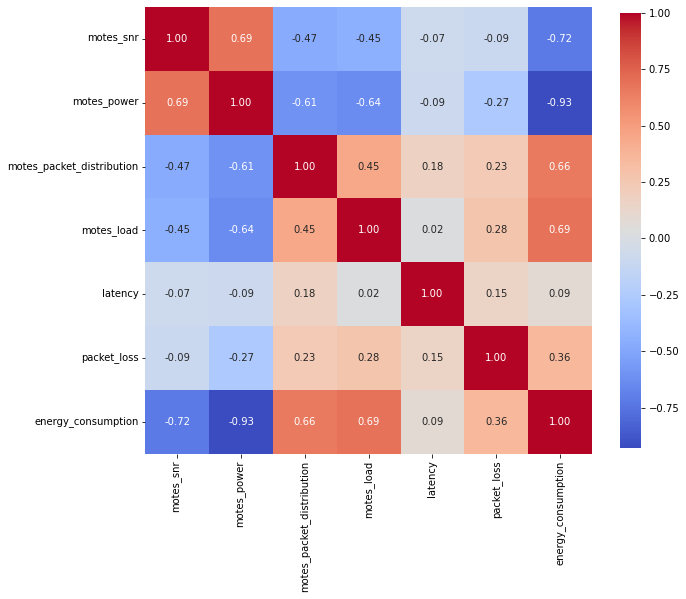

In [93]:
corr = df[columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.savefig('heatmap1.png', dpi=300, bbox_inches='tight')

plt.show()

In [90]:
# define the columns that contain lists
object_columns = ['motes_snr', 'motes_power', 'motes_packet_distribution', 'motes_load']

for col in object_columns:
    # convert the string representation of lists into actual lists
    # replace each list with its mean
    df[col] = df[col].apply(lambda x: np.mean(x))

df

,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption,Version,motes_snr_classification_std,motes_snr_classification
0,0.669118,0.858824,0.823529,0.585714,0.295095,0.090489,0.005325,v1,high,high
1,0.669118,0.858824,0.823529,0.585714,0.224750,0.036428,0.005932,v1,high,high
2,0.669118,0.858824,0.823529,0.585714,0.197107,0.010344,0.006273,v1,high,high
3,0.669118,0.858824,0.823529,0.585714,0.185598,0.000000,0.006608,v1,high,high
4,0.669118,0.858824,0.823529,0.585714,0.162507,0.000000,0.006932,v1,high,high
...,...,...,...,...,...,...,...,...,...,...
126235,0.518315,0.746032,0.845238,0.654722,0.411424,0.012853,0.960427,v2,low,low
126236,0.577381,0.725397,0.845238,0.394130,0.599423,0.123478,0.986266,v2,medium,low
126237,0.619048,0.763492,0.845238,0.652778,0.644477,0.170746,0.982875,v2,medium,high
126238,0.503663,0.744444,0.845238,0.656389,0.441677,0.210904,0.974629,v2,low,low


In [141]:
df.describe()

,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption,number_of_motes,utility
count,126240.000000,126240.000000,126240.000000,126240.000000,126240.000000,126240.000000,126240.000000,126240.000000,126240.000000
mean,0.600485,0.779197,0.825419,0.607505,0.482219,0.061241,0.477645,25.707224,0.292829
std,0.043403,0.077133,0.027654,0.054066,0.151980,0.095321,0.482862,10.996147,0.040341
min,0.459707,0.620635,0.705882,0.318059,0.000000,0.000000,0.000000,15.000000,0.164583
25%,0.573016,0.701587,0.823529,0.571429,0.375818,0.000000,0.007122,15.000000,0.263408
50%,0.594771,0.811765,0.823529,0.600164,0.488843,0.016527,0.013851,15.000000,0.296868
75%,0.620915,0.850980,0.845238,0.652778,0.590099,0.079128,0.973235,37.000000,0.322767
max,0.720588,0.890196,0.845238,0.673056,1.000000,1.000000,1.000000,37.000000,0.402290


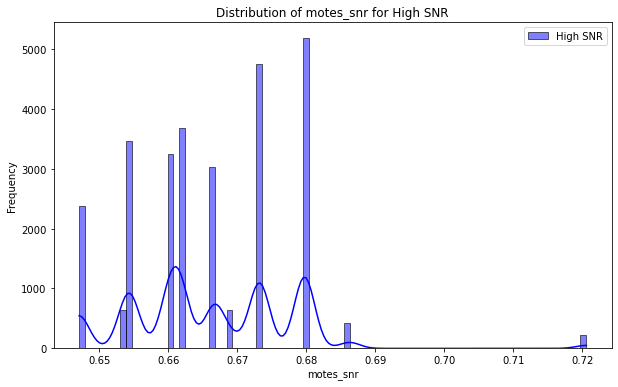

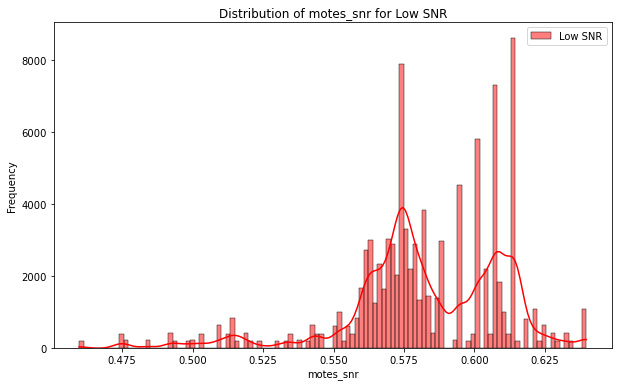

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for high and low motes_snr
df_high_snr = df[df['motes_snr_classification_std'] == 'high']
df_low_snr = df[df['motes_snr_classification_std'] == 'low']

# Plot graph for high motes_snr
plt.figure(figsize=(10, 6))
sns.histplot(df_high_snr['motes_snr'], kde=True, color='blue', label='High SNR')
plt.title('Distribution of motes_snr for High SNR')
plt.xlabel('motes_snr')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('high_snr_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot graph for low motes_snr
plt.figure(figsize=(10, 6))
sns.histplot(df_low_snr['motes_snr'], kde=True, color='red', label='Low SNR')
plt.title('Distribution of motes_snr for Low SNR')
plt.xlabel('motes_snr')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('low_snr_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



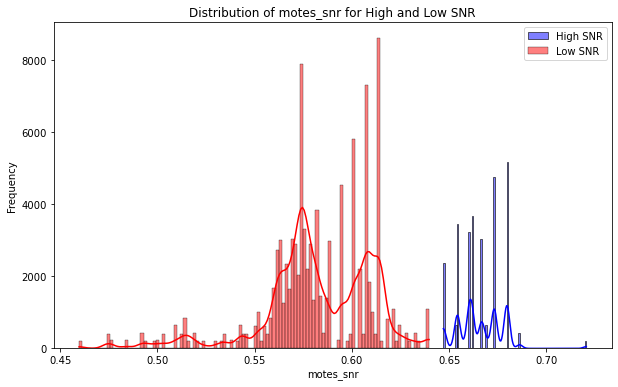

In [127]:
# Filter data for high and low motes_snr
df_high_snr = df[df['motes_snr_classification_std'] == 'high']
df_low_snr = df[df['motes_snr_classification_std'] == 'low']

# Plot graph comparing low and high motes_snr
plt.figure(figsize=(10, 6))
sns.histplot(df_high_snr['motes_snr'], kde=True, color='blue', label='High SNR')
sns.histplot(df_low_snr['motes_snr'], kde=True, color='red', label='Low SNR')
plt.title('Distribution of motes_snr for High and Low SNR')
plt.xlabel('motes_snr')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('snr_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


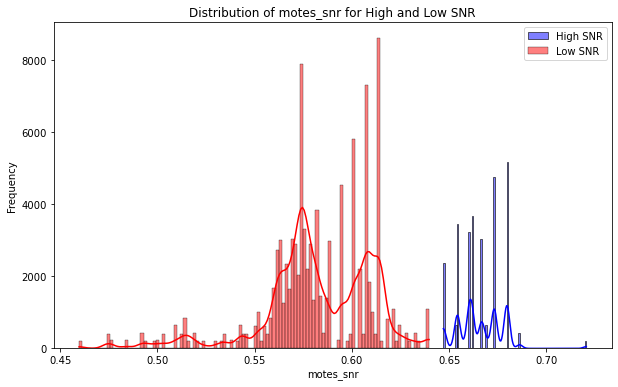

Mean motes_snr for High SNR: 0.67
Mean motes_snr for Low SNR: 0.58

Distribution of motes_snr:
High SNR:
count    27648.000000
mean         0.666086
std          0.011486
min          0.647059
25%          0.660131
50%          0.666667
75%          0.673203
max          0.720588
Name: motes_snr, dtype: float64

Low SNR:
count    98592.000000
mean         0.582089
std          0.028808
min          0.459707
25%          0.569841
50%          0.580357
75%          0.606349
max          0.639706
Name: motes_snr, dtype: float64


In [140]:

# Filter data for high and low motes_snr
df_high_snr = df[df['motes_snr_classification_std'] == 'high']
df_low_snr = df[df['motes_snr_classification_std'] == 'low']

# Plot graph comparing low and high motes_snr
plt.figure(figsize=(10, 6))
sns.histplot(df_high_snr['motes_snr'], kde=True, color='blue', label='High SNR')
sns.histplot(df_low_snr['motes_snr'], kde=True, color='red', label='Low SNR')
plt.title('Distribution of motes_snr for High and Low SNR')
plt.xlabel('motes_snr')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('snr_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate mean and distribution for each category
mean_high_snr = df_high_snr['motes_snr'].mean()
mean_low_snr = df_low_snr['motes_snr'].mean()

print(f"Mean motes_snr for High SNR: {mean_high_snr:.2f}")
print(f"Mean motes_snr for Low SNR: {mean_low_snr:.2f}")

print("\nDistribution of motes_snr:")
print("High SNR:")
print(df_high_snr['motes_snr'].describe())
print("\nLow SNR:")
print(df_low_snr['motes_snr'].describe())


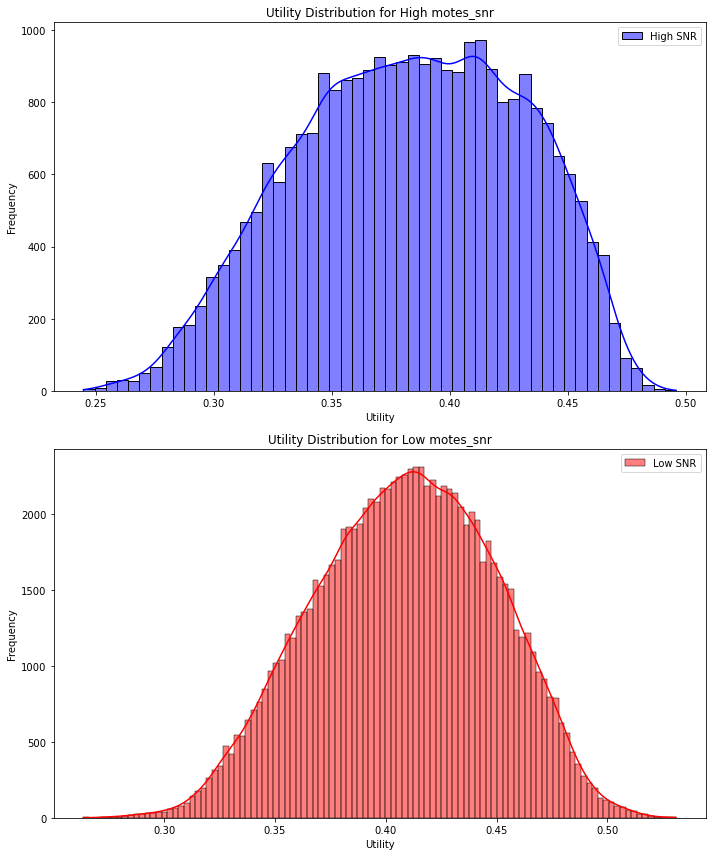

In [123]:
# Filter data for high and low motes_snr
df_high_snr = df[df['motes_snr_classification_std'] == 'high']
df_low_snr = df[df['motes_snr_classification_std'] == 'low']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot graph for high motes_snr
sns.histplot(df_high_snr['utility'], kde=True, color='blue', label='High SNR', ax=axes[0])
axes[0].set_title('Utility Distribution for High motes_snr')
axes[0].set_xlabel('Utility')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot graph for low motes_snr
sns.histplot(df_low_snr['utility'], kde=True, color='red', label='Low SNR', ax=axes[1])
axes[1].set_title('Utility Distribution for Low motes_snr')
axes[1].set_xlabel('Utility')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()



In [94]:
# Calculate the mean and standard deviation
mean_snr = df['motes_snr'].mean()
std_snr = df['motes_snr'].std()

# Create a new column for classification considering standard deviation
df['motes_snr_classification'] = np.where(df['motes_snr'] > mean_snr, 'high', 'low')

df


,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption,Version,motes_snr_classification
0,0.669118,0.858824,0.823529,0.585714,0.295095,0.090489,0.005325,v1,high
1,0.669118,0.858824,0.823529,0.585714,0.224750,0.036428,0.005932,v1,high
2,0.669118,0.858824,0.823529,0.585714,0.197107,0.010344,0.006273,v1,high
3,0.669118,0.858824,0.823529,0.585714,0.185598,0.000000,0.006608,v1,high
4,0.669118,0.858824,0.823529,0.585714,0.162507,0.000000,0.006932,v1,high
...,...,...,...,...,...,...,...,...,...
126235,0.518315,0.746032,0.845238,0.654722,0.411424,0.012853,0.960427,v2,low
126236,0.577381,0.725397,0.845238,0.394130,0.599423,0.123478,0.986266,v2,low
126237,0.619048,0.763492,0.845238,0.652778,0.644477,0.170746,0.982875,v2,high
126238,0.503663,0.744444,0.845238,0.656389,0.441677,0.210904,0.974629,v2,low


In [88]:
#calculate the mean and standard deviation
mean_snr = df['motes_snr'].mean()
std_snr = df['motes_snr'].std()

#create a new column for classification considering standard deviation
df['motes_snr_classification_std'] = df['motes_snr'].apply(lambda x: 'high' if x > mean_snr + std_snr else ('low' if x < mean_snr - std_snr else 'medium'))

#display the DataFrame to check the result
df


,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption,Version,motes_snr_classification_std
0,0.669118,0.858824,0.823529,0.585714,0.295095,0.090489,0.005325,v1,high
1,0.669118,0.858824,0.823529,0.585714,0.224750,0.036428,0.005932,v1,high
2,0.669118,0.858824,0.823529,0.585714,0.197107,0.010344,0.006273,v1,high
3,0.669118,0.858824,0.823529,0.585714,0.185598,0.000000,0.006608,v1,high
4,0.669118,0.858824,0.823529,0.585714,0.162507,0.000000,0.006932,v1,high
...,...,...,...,...,...,...,...,...,...
126235,0.518315,0.746032,0.845238,0.654722,0.411424,0.012853,0.960427,v2,low
126236,0.577381,0.725397,0.845238,0.394130,0.599423,0.123478,0.986266,v2,medium
126237,0.619048,0.763492,0.845238,0.652778,0.644477,0.170746,0.982875,v2,medium
126238,0.503663,0.744444,0.845238,0.656389,0.441677,0.210904,0.974629,v2,low


In [146]:
from scipy.stats import truncnorm

def truncate(utility):
    bounds = (0, 1)
    lower_bound, upper_bound = bounds

    if utility > upper_bound:
        utility = upper_bound
    elif utility < lower_bound:
        utility = lower_bound

    range_ = upper_bound - lower_bound
    result = float((utility - lower_bound) / range_)
    return result

def truncated_normal(lower, upper, mean, stdev):
    a, b = (lower - mean) / stdev, (upper - mean) / stdev
    return truncnorm.rvs(a, b, loc=mean, scale=stdev)

def normal(mean, stdev):
    return np.random.normal(loc=mean, scale=stdev)

def uniform(lower, upper):
    return np.random.uniform(low=lower, high=upper)

def utilityDeltaIoT(motes_snr, packet_loss, motes_load, number_of_motes):
    # Constants
    SNR_WEIGHT = 0.35
    PACKET_LOSS_WEIGHT = 0.2
    LOAD_WEIGHT = 0.1
    NUMBER_OF_MOTES_WEIGHT = 0.35
    
    # Calculate utilities
    snr_utility = motes_snr / 100  # Assuming SNR is in dB and normalized to a scale of 0-1
    packet_loss_utility = 1 - packet_loss  # Assuming packet loss is a proportion from 0-1
    load_utility = 1 - motes_load / number_of_motes  

    # Calculate total utility
    utility = (SNR_WEIGHT * snr_utility + PACKET_LOSS_WEIGHT * packet_loss_utility +
               LOAD_WEIGHT * load_utility + NUMBER_OF_MOTES_WEIGHT * number_of_motes / 100)

    # Truncate utility
    truncated_utility = truncate(utility)
    
    return truncated_utility


# Determine the number of motes based on the Version column
df['number_of_motes'] = np.where(df['Version'] == 'v1', 15, 37)

# Apply the utilityDeltaIoT function to calculate the utility
df['utility'] = df.apply(lambda row: utilityDeltaIoT(row['motes_snr'], row['packet_loss'], row['motes_load'], row['number_of_motes']), axis=1)


df


,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption,Version,motes_snr_classification,motes_snr_classification_std,number_of_motes,utility,snr_category
0,0.669118,0.858824,0.823529,0.585714,0.295095,0.090489,0.005325,v1,high,high,15,0.291918,high
1,0.669118,0.858824,0.823529,0.585714,0.224750,0.036428,0.005932,v1,high,high,15,0.305987,high
2,0.669118,0.858824,0.823529,0.585714,0.197107,0.010344,0.006273,v1,high,high,15,0.311516,high
3,0.669118,0.858824,0.823529,0.585714,0.185598,0.000000,0.006608,v1,high,high,15,0.313818,high
4,0.669118,0.858824,0.823529,0.585714,0.162507,0.000000,0.006932,v1,high,high,15,0.318436,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126235,0.518315,0.746032,0.845238,0.654722,0.411424,0.012853,0.960427,v2,low,low,37,0.347260,low
126236,0.577381,0.725397,0.845238,0.394130,0.599423,0.123478,0.986266,v2,low,low,37,0.310571,low
126237,0.619048,0.763492,0.845238,0.652778,0.644477,0.170746,0.982875,v2,high,low,37,0.301007,high
126238,0.503663,0.744444,0.845238,0.656389,0.441677,0.210904,0.974629,v2,low,low,37,0.341153,low


In [147]:
df.describe()

,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption,number_of_motes,utility
count,126240.000000,126240.000000,126240.000000,126240.000000,126240.000000,126240.000000,126240.000000,126240.000000,126240.000000
mean,0.600485,0.779197,0.825419,0.607505,0.482219,0.061241,0.477645,25.707224,0.292829
std,0.043403,0.077133,0.027654,0.054066,0.151980,0.095321,0.482862,10.996147,0.040341
min,0.459707,0.620635,0.705882,0.318059,0.000000,0.000000,0.000000,15.000000,0.164583
25%,0.573016,0.701587,0.823529,0.571429,0.375818,0.000000,0.007122,15.000000,0.263408
50%,0.594771,0.811765,0.823529,0.600164,0.488843,0.016527,0.013851,15.000000,0.296868
75%,0.620915,0.850980,0.845238,0.652778,0.590099,0.079128,0.973235,37.000000,0.322767
max,0.720588,0.890196,0.845238,0.673056,1.000000,1.000000,1.000000,37.000000,0.402290


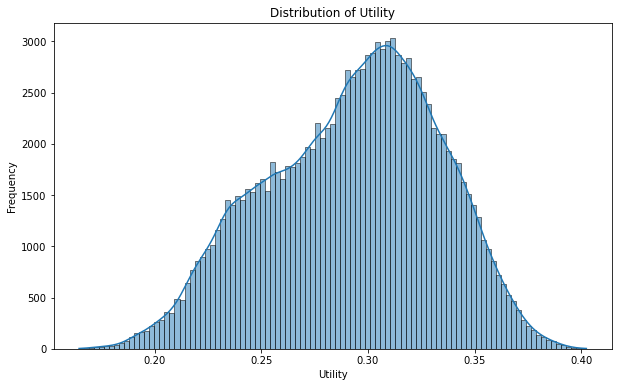

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the utility distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['utility'], kde=True)
plt.title('Distribution of Utility')
plt.xlabel('Utility')
plt.ylabel('Frequency')
plt.show()


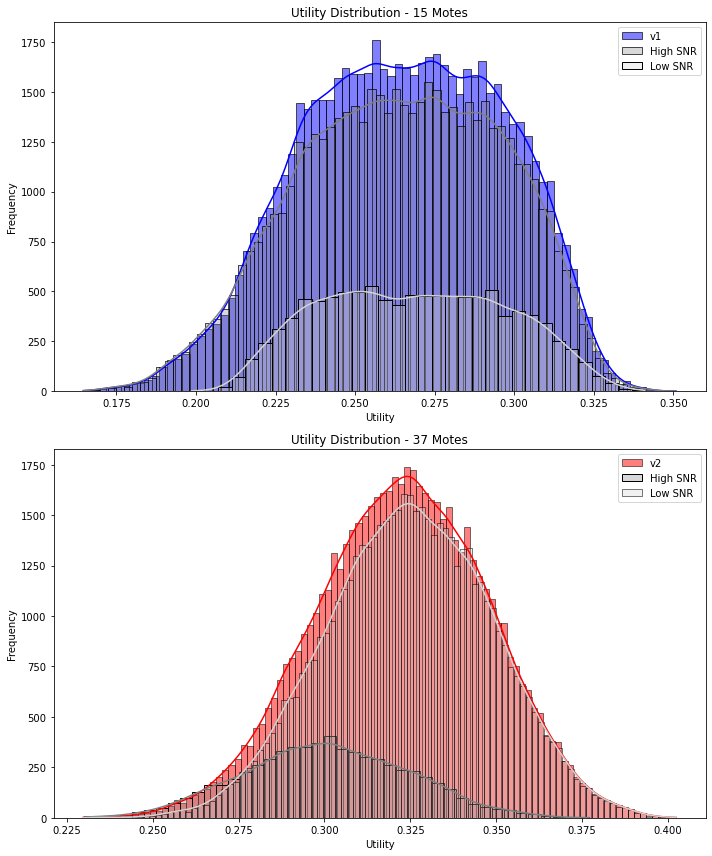

In [137]:
version_colors = {'v1': 'blue', 'v2': 'red'}

# Define SNR categories
df['snr_category'] = np.where(df['motes_snr'] > mean_snr, 'high', 'low')

# Create subplots for each version
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot utility for version v1
sns.histplot(df[df['Version'] == 'v1']['utility'], kde=True, color=version_colors['v1'], label='v1', ax=axes[0])
# Shade high SNR values for v1
sns.histplot(df[(df['Version'] == 'v1') & (df['snr_category'] == 'high')]['utility'], kde=True, color='gray', alpha=0.3, label='High SNR', ax=axes[0])
# Shade low SNR values for v1
sns.histplot(df[(df['Version'] == 'v1') & (df['snr_category'] == 'low')]['utility'], kde=True, color='lightgray', alpha=0.3, label='Low SNR', ax=axes[0])
axes[0].set_title('Utility Distribution - 15 Motes')
axes[0].set_xlabel('Utility')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot utility for version v2
sns.histplot(df[df['Version'] == 'v2']['utility'], kde=True, color=version_colors['v2'], label='v2', ax=axes[1])
# Shade high SNR values for v2
sns.histplot(df[(df['Version'] == 'v2') & (df['snr_category'] == 'high')]['utility'], kde=True, color='gray', alpha=0.3, label='High SNR', ax=axes[1])
# Shade low SNR values for v2
sns.histplot(df[(df['Version'] == 'v2') & (df['snr_category'] == 'low')]['utility'], kde=True, color='lightgray', alpha=0.3, label='Low SNR', ax=axes[1])
axes[1].set_title('Utility Distribution - 37 Motes')
axes[1].set_xlabel('Utility')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()



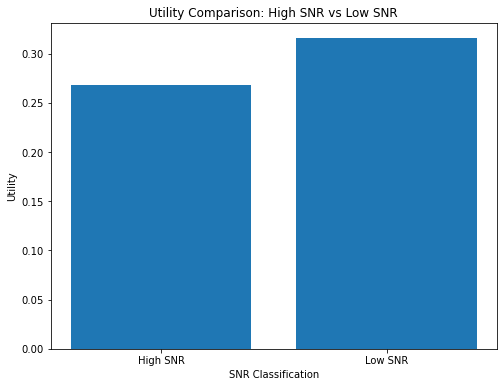

In [138]:
# Filter the DataFrame for high SNR and low SNR
df_high_snr = df[df['motes_snr_classification'] == 'high']
df_low_snr = df[df['motes_snr_classification'] == 'low']

# Calculate utility values for high SNR and low SNR
utility_high_snr = df_high_snr.apply(lambda row: utilityDeltaIoT(row['motes_snr'], row['packet_loss'], row['motes_load'], 15 if row['Version'] == 'v1' else 37), axis=1)
utility_low_snr = df_low_snr.apply(lambda row: utilityDeltaIoT(row['motes_snr'], row['packet_loss'], row['motes_load'], 15 if row['Version'] == 'v1' else 37), axis=1)

# Create a bar plot to compare utility for high SNR and low SNR
plt.figure(figsize=(8, 6))
plt.bar(['High SNR', 'Low SNR'], [utility_high_snr.mean(), utility_low_snr.mean()])
plt.xlabel('SNR Classification')
plt.ylabel('Utility')
plt.title('Utility Comparison: High SNR vs Low SNR')
plt.show()


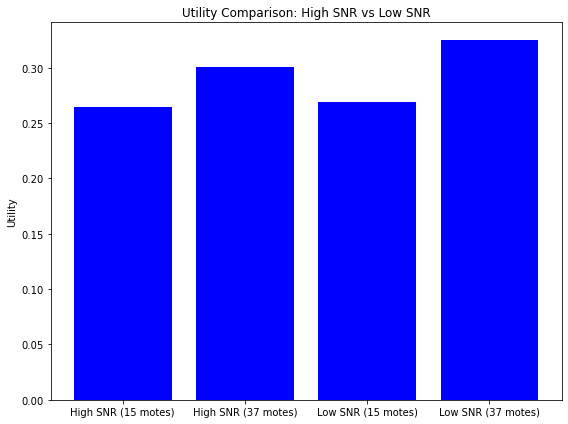

In [139]:
import matplotlib.pyplot as plt

# Filter the DataFrame for high SNR and low SNR
df_high_snr = df[df['motes_snr_classification'] == 'high']
df_low_snr = df[df['motes_snr_classification'] == 'low']

# Calculate utility values for high SNR and low SNR
utility_high_snr_15 = df_high_snr[df_high_snr['Version'] == 'v1'].apply(lambda row: utilityDeltaIoT(row['motes_snr'], row['packet_loss'], row['motes_load'], 15), axis=1)
utility_high_snr_37 = df_high_snr[df_high_snr['Version'] != 'v1'].apply(lambda row: utilityDeltaIoT(row['motes_snr'], row['packet_loss'], row['motes_load'], 37), axis=1)
utility_low_snr_15 = df_low_snr[df_low_snr['Version'] == 'v1'].apply(lambda row: utilityDeltaIoT(row['motes_snr'], row['packet_loss'], row['motes_load'], 15), axis=1)
utility_low_snr_37 = df_low_snr[df_low_snr['Version'] != 'v1'].apply(lambda row: utilityDeltaIoT(row['motes_snr'], row['packet_loss'], row['motes_load'], 37), axis=1)

# Create a bar plot to compare utility for high SNR and low SNR
x = ['High SNR (15 motes)', 'High SNR (37 motes)', 'Low SNR (15 motes)', 'Low SNR (37 motes)']
utility_values = [utility_high_snr_15.mean(), utility_high_snr_37.mean(), utility_low_snr_15.mean(), utility_low_snr_37.mean()]

plt.figure(figsize=(8, 6))
plt.bar(x, utility_values, color='blue')
plt.ylabel('Utility')
plt.title('Utility Comparison: High SNR vs Low SNR')
plt.tight_layout()
plt.show()

